In [1]:
# Om Sri Sai Ram

In [91]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import time

import seaborn as sns


In [92]:
df0 = pd.read_csv('Index Rent Smart.csv',parse_dates=['date','last_major_renovation_date'],index_col=0)

/Users/bhavanian/myenvs/housing/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (57,68,70) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [93]:
# dict(df0.iloc[0,:])

In [94]:
df0.shape

(127232, 123)

In [96]:
#owners

In [117]:
owners_df = df0[['address','Index','owner']]

In [118]:
owners_df_byaddress = pd.DataFrame(owners_df.groupby('address').mean())

In [119]:
owners_df_byaddress = owners_df_byaddress.rename(columns={'Index':'Severity'})

In [127]:
owners_df_byaddress['owner'] = pd.DataFrame(owners_df.groupby('address')['owner'].agg(pd.Series.mode))

In [133]:
owners_df_byaddress['Index_Sum'] = pd.DataFrame(owners_df.groupby('address').sum()).rename(columns={'Index':'Index_Sum'})['Index_Sum']

In [134]:
owners_df_byaddress

Severity                owner  Index_Sum
address                                                         
1 Abbotsford St, 02121  5.000000  MONTEIRO JOAO FELIX         10
1 Acorn St, 02108       8.000000  ROOSEVELT CANDACE C         40
1 Adams St, 02129       5.000000        FRIED SUSAN V          5
1 Akron Pl, 02119       5.000000        BASS MURRAY E          5
1 Aldie St, 02134       5.000000       BURDIN ANTHONY         35
...                          ...                  ...        ...
994 River St, 02136     5.222222         JEAN EDELINE         47
995 Centre St, 02130    5.000000       MCGRATH JOHN T          5
996 South St, 02131     4.666667     RUSSELL ANDREA L         14
998 Tremont St, 02120   5.769231      ARSH REALTY LLC         75
999 South St, 02131     4.000000   BARBER CHRISTOPHER          4

[25560 rows x 3 columns]

In [136]:
owners_df_byaddress.nlargest(10,'Severity')

Severity                      owner  Index_Sum
address                                                              
1 Alna Pl, 02128           10.0       PARONICH JOHN P ETAL         20
1 Alpine Pl, 02119         10.0           SOUTHENDEXTI LLC         30
1 Autumn St, 02132         10.0  QI QU FAMILY REALTY TRUST         10
1 Avon Pl, 02129           10.0                SCULLY GAIL         10
1 Bennet Pl, 02128         10.0        LINDSAY JOHN EDWARD         20
1 Bowditch Rd, 02130       10.0             FILBIN MICHAEL         10
1 Claremont St, 02118      10.0             BURNES ETHAN M         10
1 Copeland Pl, 02119       10.0        ALEXANDER WILLIAM H         10
1 Eagle St, 02132          10.0       DOLAN RICHARD P ETAL         70
1 Haley St, 02119          10.0               KENNEDY NEAL         10

In [137]:
owners_df_byaddress.nlargest(10,'Index_Sum')

Severity                             owner  \
address                                                                   
1 Rosa St, 02136             5.304598           GBM PORTFOLIO OWNER LLC   
221 Paris St, 02128          8.000000    MCKINLEY INVESTMENT GROUP  LLC   
4 Fountain Pl, 02113         5.080537  FOUR FOUNTAIN PLACE LLC MASS LLC   
60 Nightingale St, 02124     4.726115               CULBREATH ELIZABETH   
15 Wales St, 02124           4.753247                MARTIN JAMES H III   
3 Oakhurst St, 02124         4.600000          WHITEACRE PROPERTIES LLC   
11 Forbes St, 02130          4.813559                           YU JACK   
140 Newbury St, 02116        5.044643                   ANTELL PETER TS   
227 Washington St, 02121     5.185185    A&R WASHINGTON ST LLC MASS LLC   
119 Hollingsworth St, 02126  4.463415                   LIRIANO RICHARD   

                             Index_Sum  
address                                 
1 Rosa St, 02136                   923  
221 Paris St, 02128                768  
4 Fountain Pl, 02113               757  
60 Nightingale St, 02124           742  
15 Wales St, 02124                 732  
3 Oakhurst St, 02124               598  
11 Forbes St, 02130                568  
140 Newbury St, 02116              565  
227 Washington St, 02121           560  
119 Hollingsworth St, 02126        549

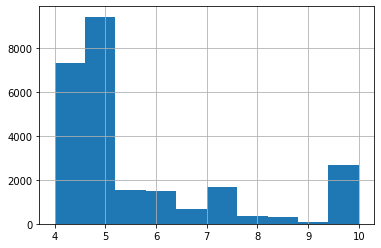

In [138]:
owners_df_byaddress.Severity.hist()
plt.show()

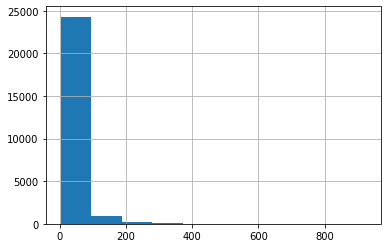

In [139]:
owners_df_byaddress.Index_Sum.hist()
plt.show()

In [ ]:
owners_df_byaddress.Severity

In [143]:
#might use names to hide
# owners_df_byaddress.owner.value_counts().hist()
# plt.show()

In [163]:
compare_owners_df = pd.DataFrame(owners_df_byaddress.groupby('owner')['Severity'].mean().rename('Avg_Severity_Score'))

In [164]:
compare_owners_df['Apt_Count'] = owners_df_byaddress.groupby('owner')['Severity'].count().rename('Apt_Count')

In [165]:
compare_owners_df

Avg_Severity_Score  Apt_Count
owner                                                        
1 ARBORVITAES LLC                         6.250000          1
1 ARION STREET LLC                        4.500000          1
1 ASPINWALL ROAD REALTY  TRUST            5.800000          1
1 ERNST STREET REALTY TRUST               8.000000          1
1 FAIRLAND LLC                            5.075472          1
...                                            ...        ...
ZUKAUSKAS ROBERT J                        5.000000          1
ZULUAGA NORMAN D                         10.000000          1
ZUNIGA WILFREDO                           4.250000          2
ZURAY NANCY TS                            7.500000          1
ZUREK ANDREW D GELLING                    4.000000          1

[23483 rows x 2 columns]

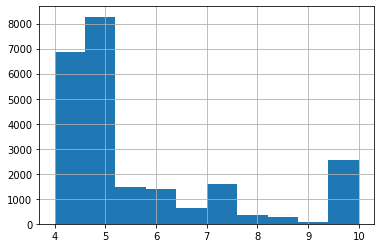

In [167]:
compare_owners_df.Avg_Severity_Score.hist()
plt.show()

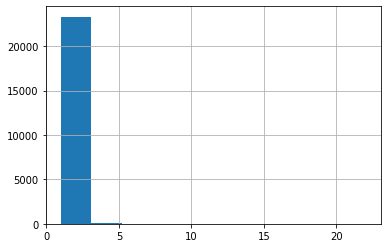

In [166]:
compare_owners_df.Apt_Count.hist()
plt.show()

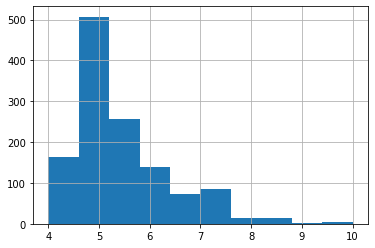

In [159]:
compare_owners_df.loc[compare_owners_df.Apt_Count > 1,'Avg_Severity_Score'].hist()
plt.show()

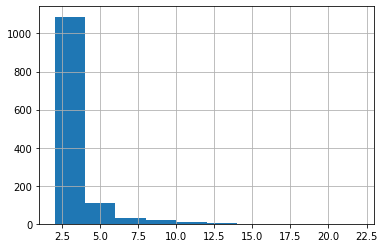

In [172]:
compare_owners_df.loc[compare_owners_df.Apt_Count > 1,'Apt_Count'].hist()
plt.show()

In [168]:
compare_owners_df 

Avg_Severity_Score  Apt_Count
owner                                                        
1 ARBORVITAES LLC                         6.250000          1
1 ARION STREET LLC                        4.500000          1
1 ASPINWALL ROAD REALTY  TRUST            5.800000          1
1 ERNST STREET REALTY TRUST               8.000000          1
1 FAIRLAND LLC                            5.075472          1
...                                            ...        ...
ZUKAUSKAS ROBERT J                        5.000000          1
ZULUAGA NORMAN D                         10.000000          1
ZUNIGA WILFREDO                           4.250000          2
ZURAY NANCY TS                            7.500000          1
ZUREK ANDREW D GELLING                    4.000000          1

[23483 rows x 2 columns]

In [169]:
compare_owners_df = compare_owners_df.reset_index()

In [170]:
compare_owners_df = compare_owners_df.loc[compare_owners_df.Apt_Count > 1]

In [171]:
compare_owners_df

owner  Avg_Severity_Score  Apt_Count
23       10-18 BRAINERD ROAD LLC            4.250000          2
147    146-148 BREMEN STREET LLC            6.250000          2
149      1470 TREMONT STREET LLC            7.300000          2
186             1576 TREMONT LLC            4.932609          2
254      18-20 OXFORD STREET LLC            5.000000          2
...                          ...                 ...        ...
23427                  ZHOU JIAN            5.817308          2
23434                 ZHU ZHI YI            5.535714          4
23470              ZOU ZONG SONG            4.883333          2
23472           ZOUZOUA STEFANIE            5.105263          2
23480            ZUNIGA WILFREDO            4.250000          2

[1257 rows x 3 columns]

In [175]:
compare_owners_df.nlargest(30,'Avg_Severity_Score')

owner  Avg_Severity_Score  Apt_Count
1075             ADAMS COURT LLC MASS LLC           10.000000          2
7062                     EISENSTEIN DVORA           10.000000          2
9344                         GRILLO JULIO           10.000000          2
11959               KODA PUP REALTY TRUST           10.000000          2
12997            LORNE ST ASSOCS MASS LPS           10.000000          2
5046                        CONTI PETER R            9.166667          2
1496                 ANDERSON CHRISTOPHER            9.000000          2
6888                     DWIGHT HOUSE LLC            8.785714          2
9984                HENDERSON THOMAS F SR            8.750000          2
18022                          RAY SEKHAR            8.750000          2
23395                         ZHAI SEN TS            8.750000          2
2267                  BASILE REALTY TRUST            8.500000          2
3506                       BURKE THOMAS J            8.500000          2
9969                      HELMS KRISTIE M            8.500000          2
15467                    NANO CALOGERO TS            8.500000          2
14798                MIRANDA OCTAVIO F TS            8.333333          2
16341                   ONAYEMI ADEYEMI O            8.333333          2
9556                           HAJJ JIHAD            8.200000          2
14643                MICHALOWSKI PHILIP T            8.200000          2
16158             OCONNOR REVOCABLE TRUST            8.200000          2
1136               AGOSTINO CHRISTOPHER R            8.166667          2
10051                    HERNANDEZ JOSE L            8.150000          2
9371   GROVE HALL APARTMENTS LLC MASS LLC            8.138889          6
567                      365 E STREET LLC            8.125000          2
12959                       LOPEZ AIDA TS            8.000000          3
8200                FRANKLIN HIGHLANDS LP            7.911565          7
433                        28 NORWOOD LLC            7.900000          2
7936                      FOLAN MICHAEL J            7.875000          2
7597                      FERNANDES MARIA            7.785714          2
18865               RUMSIS STEPHEN A ETAL            7.777778          2

In [ ]:
#to bin: year built, year remodeled, latitude, longitude

In [ ]:
	Field Name	Source	Description
80	building_typology	Classification	General building typology classification
81	building_subtypology	Classification	Building typology classification including subtypology based on building age
	Field Name	Source	Description
79	year_built_class	Classification	Building age classification

In [ ]:
# maybe should get pearson coefs for everything?

In [67]:
categorical_vars = pd.get_dummies(df0[['neighborhood',
                                       # 'violation_type','description',
                                       'zipcode_str','parcel','owner','property_type','st_name','st_name_suf','building_typology',
                                      'use_class',
 'sqft_class',
 'year_built_class',
                                      'ptype',
                                      'lu',
                                      'assessor_category',
 'assessor_description',
 'own_occ',
  'structure_class',
                                     'bldg_styl', 
                                      'r_roof_typ',
 'ext_fin',
                                      'insulation_type',
 'foundation_type',
 'heat_typ',
                                      'ac','historic_district',
 'landmark',
 'flood',
 'stormwater','census_tract_number',
                                      'cashp_only',
 'cashp_and_elec_upgrade',
 'cashp_outdoor',
 'dashp_only',
 'dashp_and_elec_upgrade',
 'dashp_outdoor',
 'gshp_only',
 'gshp_and_elec_upgrade',
 'vrf_only',
 'vrf_and_elec_upgrade',
 'awhp_only',
 'awhp_and_elec_upgrade',
 'hp_recommendation_count',
 'insulate_attic',
 'insulate_attic_converted',
 'ext_roof_insulation',
 'insulate_exposed_ducts',
 'insulate_exposed_pipes',
 'interior_wall_insulation_blow_in',
 'exterior_wall_insulation_at_replacement',
 'exterior_wall_insulation',
 'interior_wall_insulation_board',
 'insulate_spandrel',
 'asbestos',
 'seal_elevator_vent_shafts',
 'env_recommendation_count']])

In [74]:
other_vars = df0[[
    'date',
 'violation_type',
 'description',
 'Index',
 'address',
 # 'year built',
 # 'year remodeled',
 'latitude',
 'longitude',
 # 'st_num',
 # 'zipcode_str',
 # 'id',
 # 'pid_long',
 # 'cm_id',
 # 'unit_num',
 # 'zipcode',
 'yr_built',
 'land_sf',
 'gross_area',
 'living_area',
 'sqft',
 'num_floors',
 'num_bldgs',
 'units_res',
 'units_com',
 'units_mixed',
 # 'ptype',
 # 'ptype_list',
 # 'existing_gshp',
 'total_site_energy_kbtu',
 'perc_electricity',
 'perc_gas',
 'perc_steam',
 'onsite_renewable_kwh',
 # 'census_tract_number',
 'ct_pop_disability',
 'ct_pop_children_under_5',
 'ct_pop_over_65',
 'ct_pop_low_to_no_income',
 'ct_pop_limited_english_proficiency',
 'ct_pop_poc',
 'ct_pop_med_illness',
 'ct_perc_disability',
 'ct_perc_children_under_5',
 'ct_perc_over_65',
 'ct_perc_low_to_no_income',
 'ct_perc_limited_english_proficiency',
 'ct_perc_poc',
 'ct_perc_med_illness',
 'ct_hh_income_200000_or_more',
 'ct_perc_income_200000_or_more',
 'hp_recommendation_count',
 'env_recommendation_count']]

In [76]:
other_vars.shape

(127232, 40)

In [77]:
categorical_vars.shape

(127232, 25830)

In [79]:
df1 = other_vars.merge(categorical_vars,left_index=True,right_index=True)

In [86]:
df1 = df1.loc[:, (df1 != 0).any(axis=0)]

In [87]:
df1.shape

(127232, 25870)

In [88]:
df1 = df1.dropna(axis=1)

In [89]:
df1.shape

(127232, 25838)

In [ ]:
agg_mean = 

In [84]:
# list(df1)

In [82]:
df_byaddress = df1.drop(columns=['date','violation_type','description'])

In [40]:
df_byaddress = df_byaddress.groupby('address').mean()

In [41]:
df_byaddress = df_byaddress.rename(columns={'Index':'Severity'})

In [42]:
index_sum = df0.groupby('address')['Index'].sum()

In [43]:
df_byaddress['Index_Sum'] = index_sum 

In [44]:
oldest_complaint = df0.groupby('address')['date'].min()

In [45]:
newest_complaint = df0.groupby('address')['date'].max()

In [46]:
df_byaddress['Timeframe'] = (newest_complaint - oldest_complaint)

In [47]:
df_byaddress['Frequency_of_Complaints'] = df_byaddress['Index_Sum'] / df_byaddress['Timeframe'].dt.days

In [ ]:
df0

In [54]:
list(df_byaddress)

['Severity',
 'zip_code',
 'parcel',
 'year built',
 'year remodeled',
 'latitude',
 'longitude',
 'st_num',
 'zipcode_str',
 'id',
 'pid_long',
 'cm_id',
 'unit_num',
 'zipcode',
 'yr_built',
 'land_sf',
 'gross_area',
 'living_area',
 'sqft',
 'num_floors',
 'num_bldgs',
 'units_res',
 'units_com',
 'units_mixed',
 'ptype',
 'ptype_list',
 'existing_gshp',
 'total_site_energy_kbtu',
 'perc_electricity',
 'perc_gas',
 'perc_steam',
 'onsite_renewable_kwh',
 'census_tract_number',
 'ct_pop_disability',
 'ct_pop_children_under_5',
 'ct_pop_over_65',
 'ct_pop_low_to_no_income',
 'ct_pop_limited_english_proficiency',
 'ct_pop_poc',
 'ct_pop_med_illness',
 'ct_perc_disability',
 'ct_perc_children_under_5',
 'ct_perc_over_65',
 'ct_perc_low_to_no_income',
 'ct_perc_limited_english_proficiency',
 'ct_perc_poc',
 'ct_perc_med_illness',
 'ct_hh_income_200000_or_more',
 'ct_perc_income_200000_or_more',
 'hp_recommendation_count',
 'env_recommendation_count',
 'Index_Sum',
 'Timeframe',
 'Freque

/var/folders/gn/2v3k2j5j1rl3jtww424x4zc40000gn/T/ipykernel_99063/1290668040.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


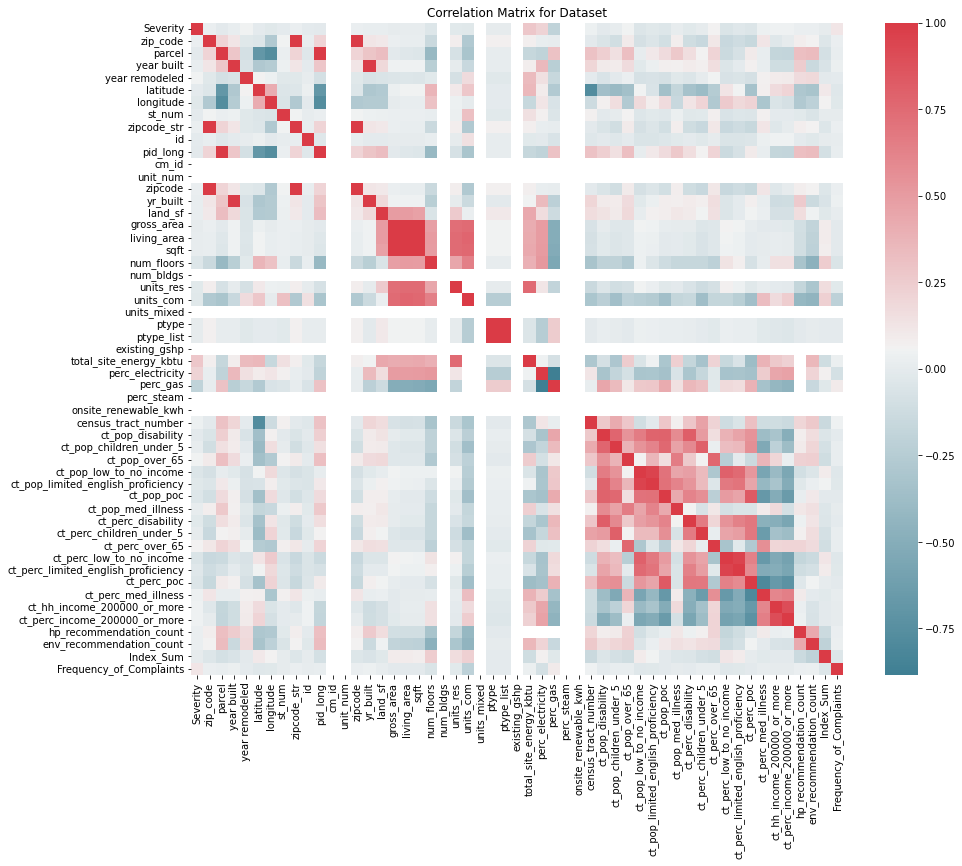

In [49]:

f, ax = plt.subplots(figsize=(15, 12))
corr = df_byaddress.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.title('Correlation Matrix for Dataset')
plt.show()

/var/folders/gn/2v3k2j5j1rl3jtww424x4zc40000gn/T/ipykernel_99063/2243344690.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(abs(corr), mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.color_palette("RdPu",20),


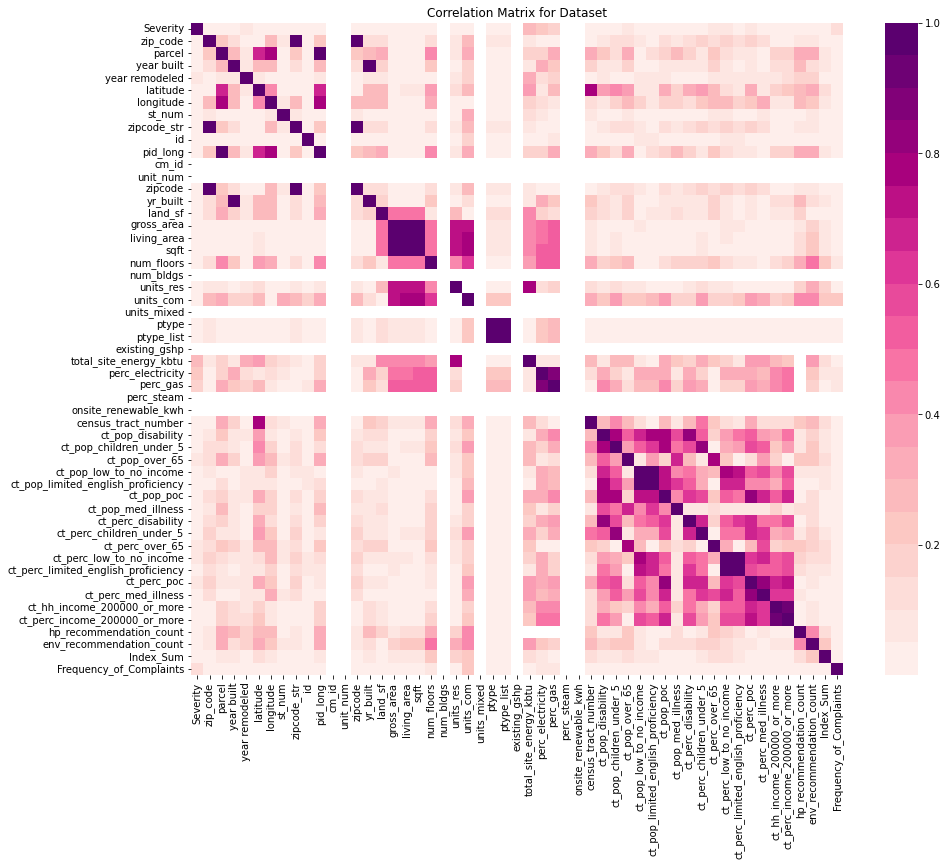

In [53]:

f, ax = plt.subplots(figsize=(15, 12))
corr = df_byaddress.corr()
sns.heatmap(abs(corr), mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.color_palette("RdPu",20),
            square=True, ax=ax)
plt.title('Correlation Matrix for Dataset')
plt.show()

In [4]:
df = pd.read_csv('byaddress_16feats_3targets_v1.csv')

In [10]:
df = df.drop(columns=['address','num_bldgs'])

In [11]:
df.corr()

year built   land_sf  gross_area  \
year built                             1.000000  0.189048    0.045333   
land_sf                                0.189048  1.000000    0.492766   
gross_area                             0.045333  0.492766    1.000000   
living_area                            0.047282  0.493255    0.993491   
sqft                                   0.048752  0.474488    0.992927   
num_floors                            -0.235243 -0.055930    0.483929   
units_res                              0.002986  0.260790    0.734824   
ct_perc_disability                     0.087376  0.099650    0.002561   
ct_perc_children_under_5               0.075316  0.054362   -0.044726   
ct_perc_over_65                        0.157832  0.153509   -0.035865   
ct_perc_low_to_no_income              -0.050281 -0.052184    0.061990   
ct_perc_limited_english_proficiency   -0.002532 -0.005991    0.053945   
ct_perc_poc                            0.072519  0.052923    0.013415   
ct_perc_med_illness                    0.020465  0.024195   -0.012815   
ct_perc_income_200000_or_more         -0.113979 -0.084221   -0.021550   
Severity                               0.019787  0.018273    0.004117   
Index_Sum                             -0.060483 -0.025585    0.087488   
Frequency_of_Complaints                0.034468  0.008119   -0.014221   

                                     living_area      sqft  num_floors  \
year built                              0.047282  0.048752   -0.235243   
land_sf                                 0.493255  0.474488   -0.055930   
gross_area                              0.993491  0.992927    0.483929   
living_area                             1.000000  0.995877    0.499996   
sqft                                    0.995877  1.000000    0.495203   
num_floors                              0.499996  0.495203    1.000000   
units_res                               0.746974  0.746990    0.442365   
ct_perc_disability                     -0.017633 -0.017580   -0.164175   
ct_perc_children_under_5               -0.060793 -0.060476   -0.163188   
ct_perc_over_65                        -0.035413 -0.035368   -0.210951   
ct_perc_low_to_no_income                0.051169  0.049699    0.136441   
ct_perc_limited_english_proficiency     0.042670  0.041124    0.076446   
ct_perc_poc                            -0.006269 -0.006941   -0.076177   
ct_perc_med_illness                     0.004019  0.004721    0.009758   
ct_perc_income_200000_or_more          -0.000386  0.002261    0.150937   
Severity                                0.007149  0.007643   -0.038806   
Index_Sum                               0.089605  0.085887    0.246916   
Frequency_of_Complaints                -0.013624 -0.013291   -0.052723   

                                     units_res  ct_perc_disability  \
year built                            0.002986            0.087376   
land_sf                               0.260790            0.099650   
gross_area                            0.734824            0.002561   
living_area                           0.746974           -0.017633   
sqft                                  0.746990           -0.017580   
num_floors                            0.442365           -0.164175   
units_res                             1.000000           -0.062757   
ct_perc_disability                   -0.062757            1.000000   
ct_perc_children_under_5             -0.120789            0.666659   
ct_perc_over_65                      -0.086565            0.198773   
ct_perc_low_to_no_income              0.066319            0.542070   
ct_perc_limited_english_proficiency   0.042257            0.635445   
ct_perc_poc                          -0.028972            0.689477   
ct_perc_med_illness                   0.007905           -0.478062   
ct_perc_income_200000_or_more        -0.015466           -0.565630   
Severity                             -0.019113           -0.017271   
Index_Sum                             0.166615      

No handles with labels found to put in legend.


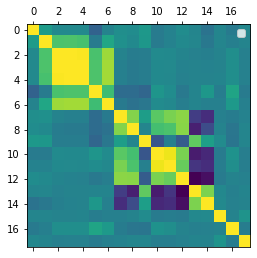

In [15]:
plt.matshow(df.corr(),label='corr. coefficient')
plt.legend()
plt.show()

/var/folders/gn/2v3k2j5j1rl3jtww424x4zc40000gn/T/ipykernel_99063/3448931824.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


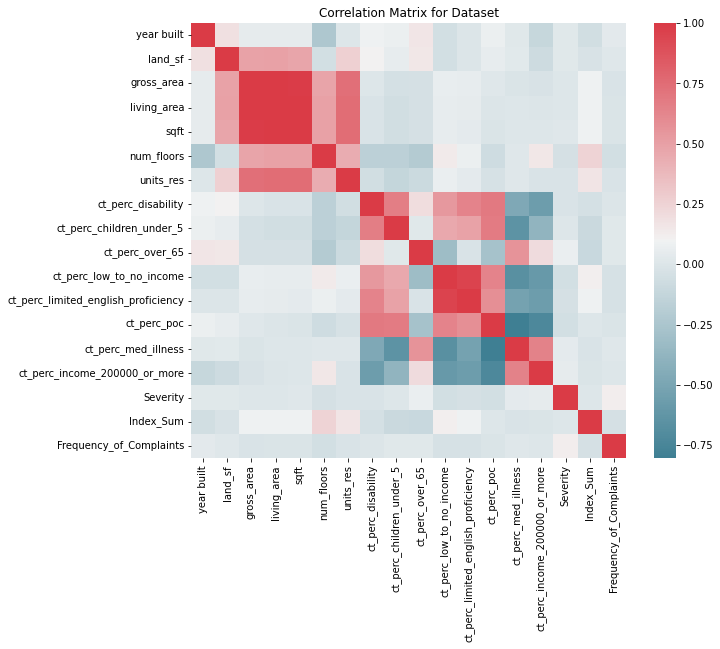

In [21]:

f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.title('Correlation Matrix for Dataset')
plt.show()

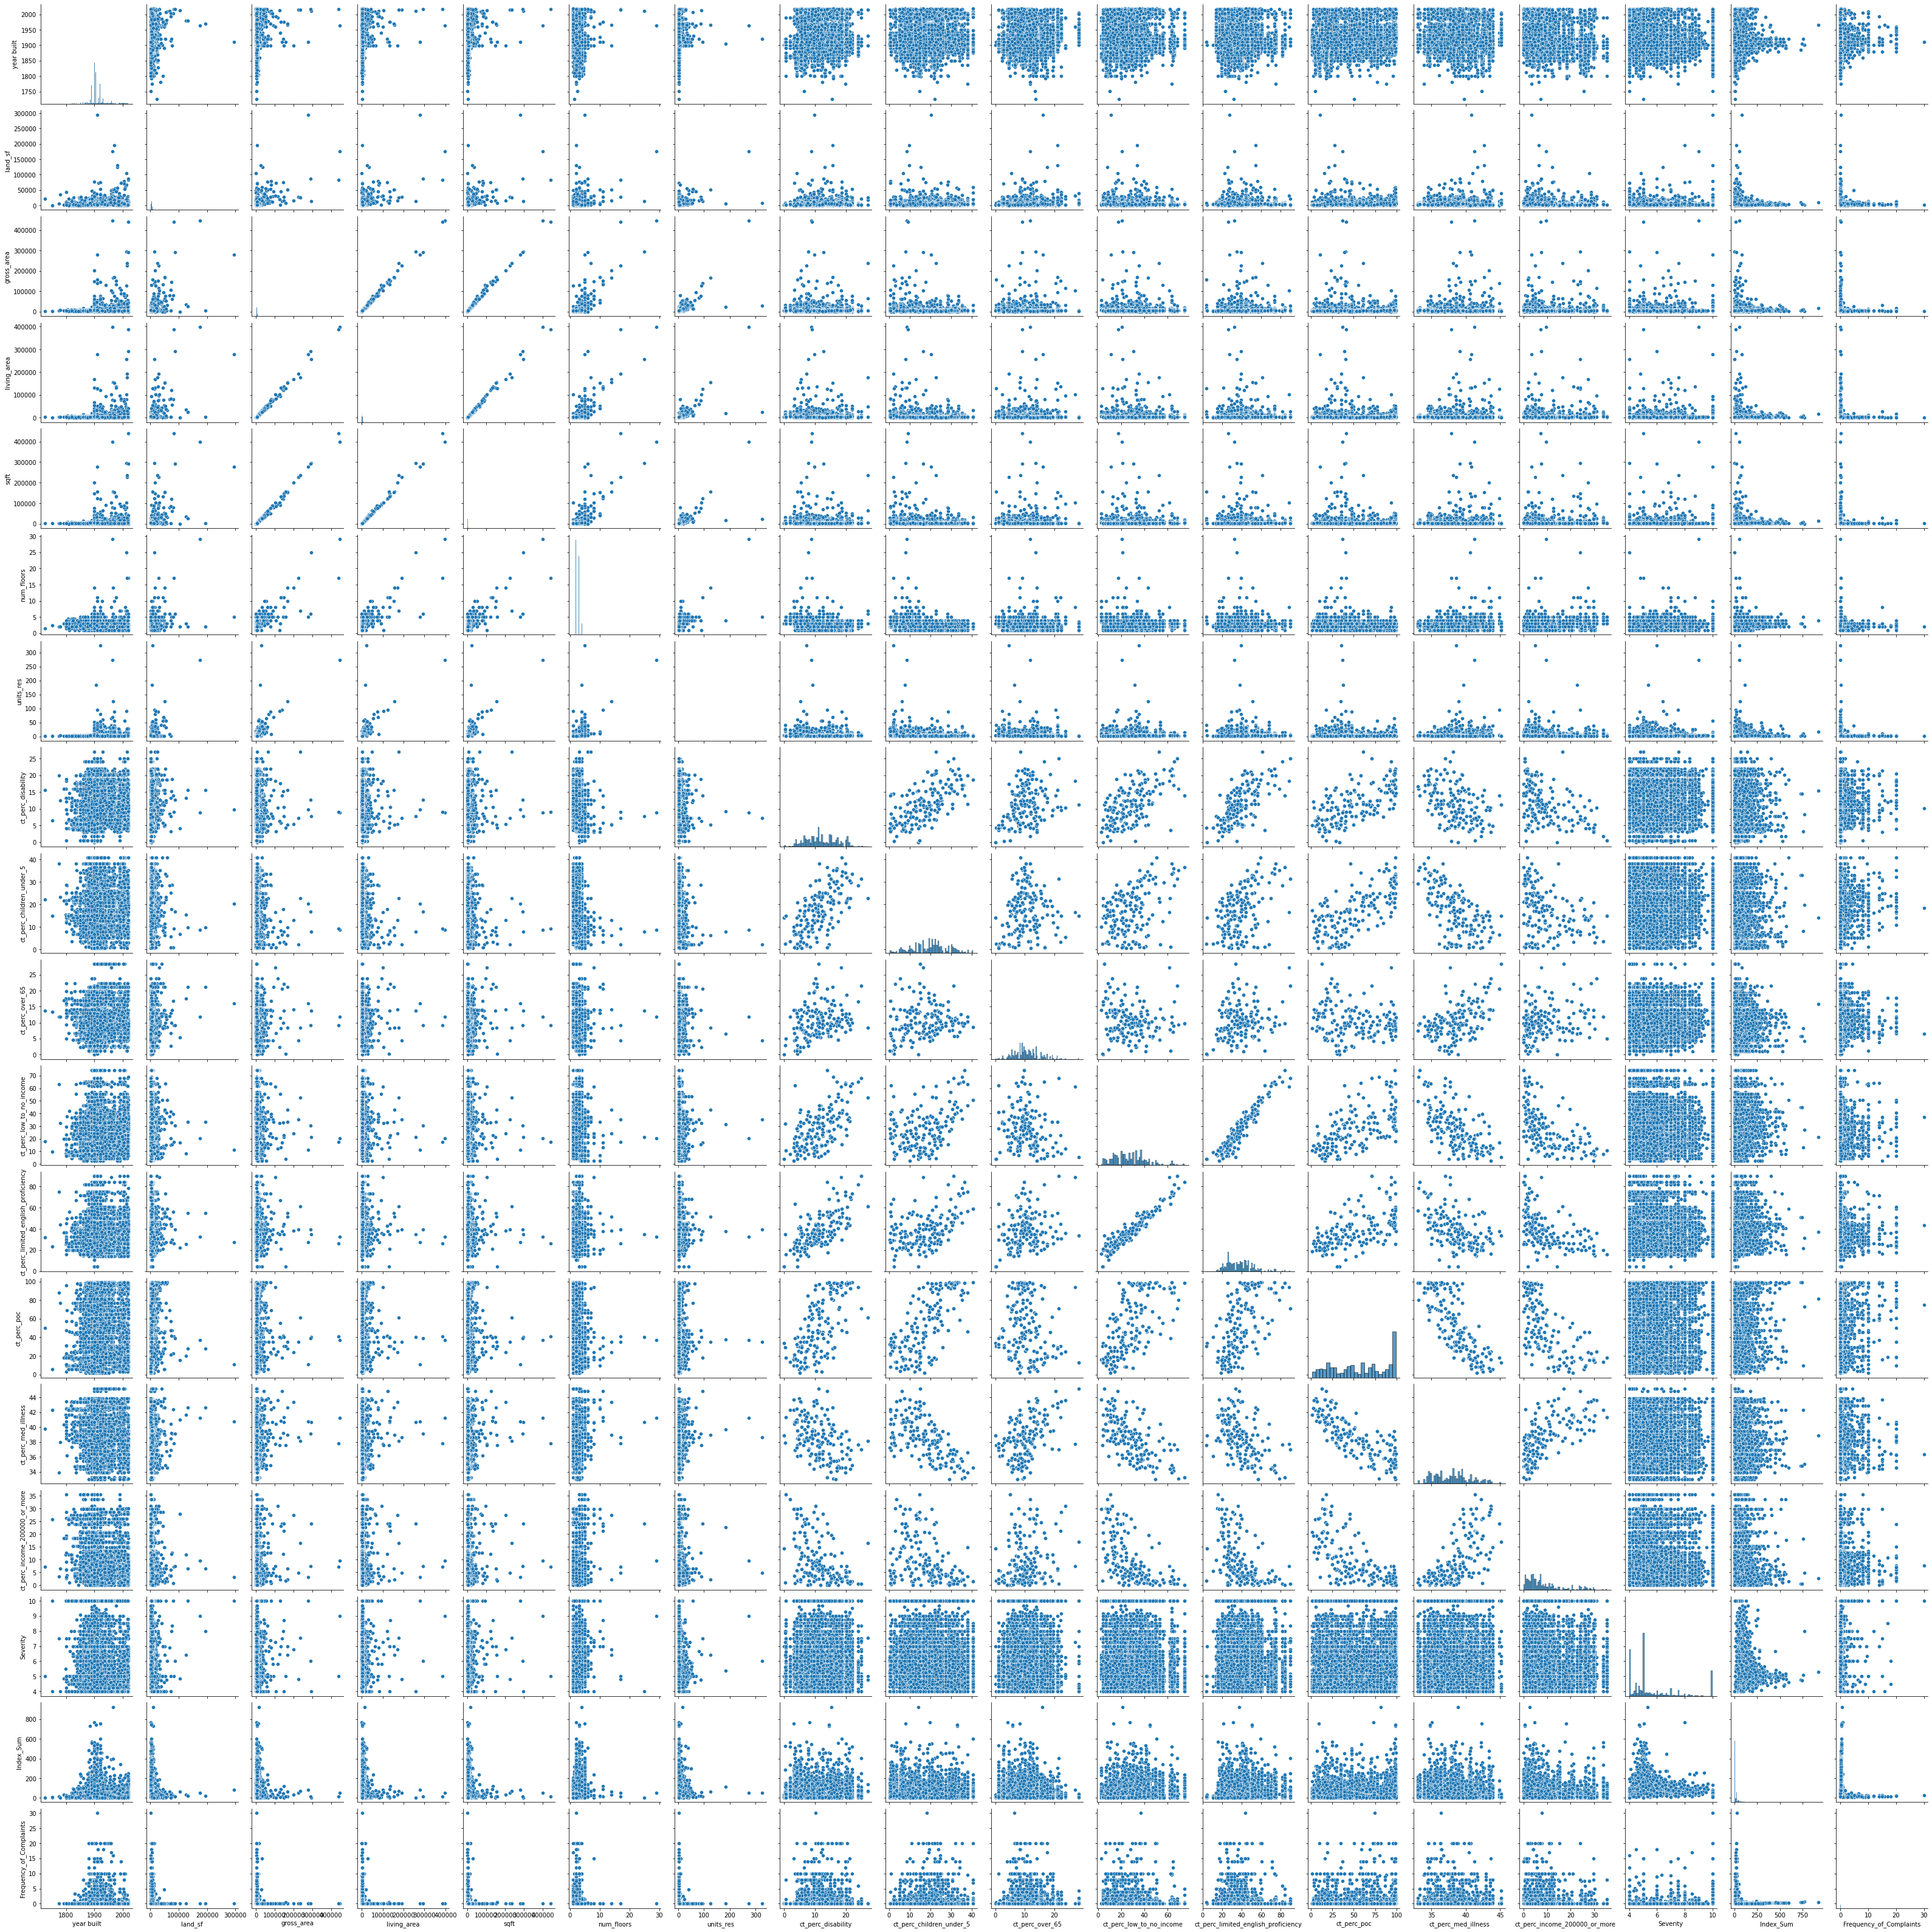

In [22]:
sns.pairplot(df)